In [2]:
# import basic libraries
import pandas as pd
import numpy as np

# import visualisations libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the student performance dataset
dataset = pd.read_csv('StudentsPerformance.csv')

#check first five rows of the dataset
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# check the shape of the dataset
print(dataset.shape)

(1000, 8)


In [6]:
# check descriptive statistics of the dataset
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# check the unique number of categorical features 
dataset.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [13]:
# Check for the missing and null values in the dataset
print(dataset.info())
print('\n------------------------------\n')
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

------------------------------

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writi

In [16]:
# get the numerical data type from dataset
numerical_dataset = dataset[['math score', 'reading score', 'writing score']]
numerical_dataset.head(1)

,math score,reading score,writing score
0,72,72,74


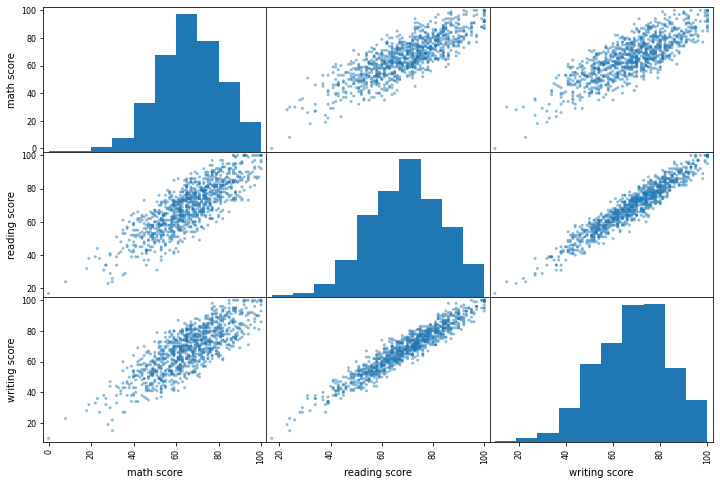

In [54]:
# plot the scatter matrix of numrical data
pd.plotting.scatter_matrix(numerical_dataset, figsize = (12,8))
plt.show()

In [24]:
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

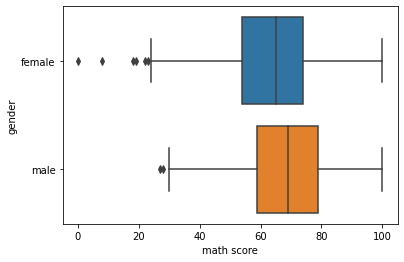

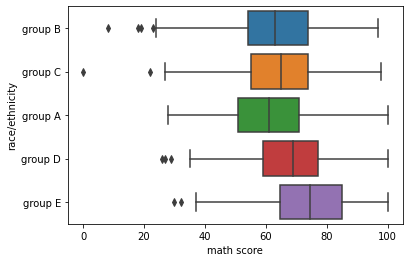

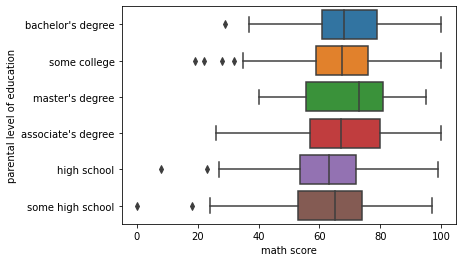

In [34]:
sns.boxplot(data=dataset, x="math score", y="gender")
plt.show()
sns.boxplot(data=dataset, x="math score", y="race/ethnicity")
plt.show()
sns.boxplot(data=dataset, x="math score", y="parental level of education")
plt.show()

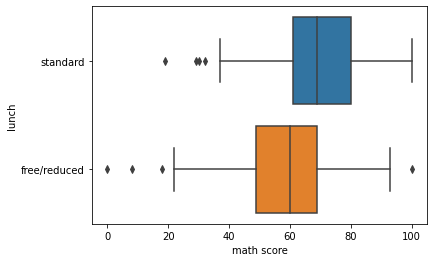

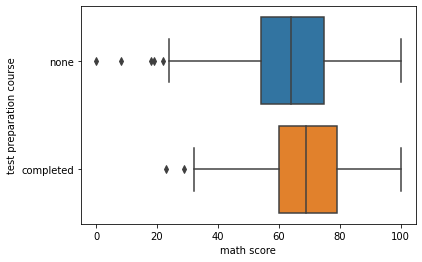

In [35]:
sns.boxplot(data=dataset, x="math score", y="lunch")
plt.show()
sns.boxplot(data=dataset, x="math score", y="test preparation course")
plt.show()

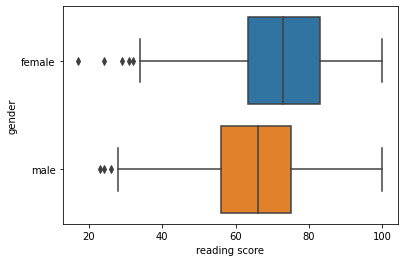

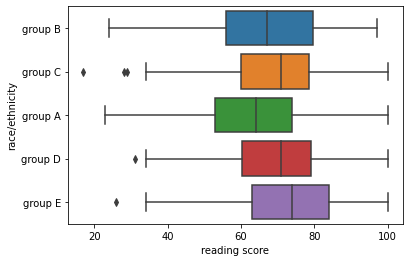

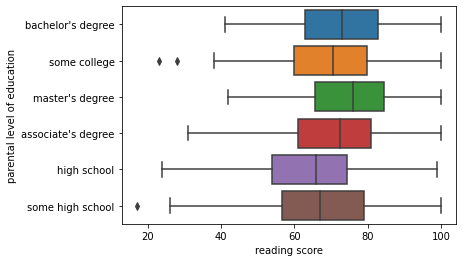

In [36]:
sns.boxplot(data=dataset, x="reading score", y="gender")
plt.show()
sns.boxplot(data=dataset, x="reading score", y="race/ethnicity")
plt.show()
sns.boxplot(data=dataset, x="reading score", y="parental level of education")
plt.show()

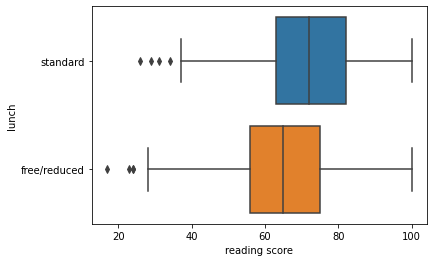

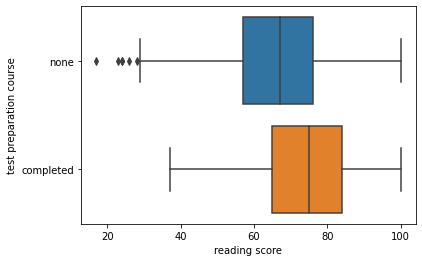

In [37]:
sns.boxplot(data=dataset, x="reading score", y="lunch")
plt.show()
sns.boxplot(data=dataset, x="reading score", y="test preparation course")
plt.show()

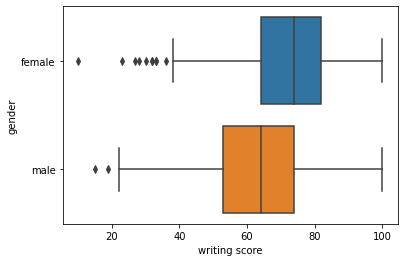

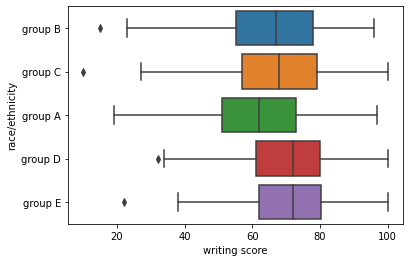

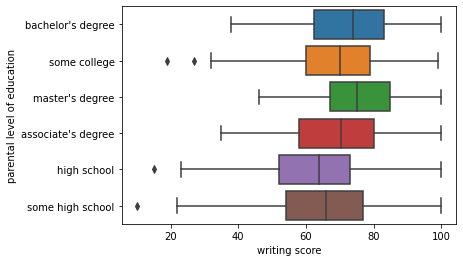

In [38]:
sns.boxplot(data=dataset, x="writing score", y="gender")
plt.show()
sns.boxplot(data=dataset, x="writing score", y="race/ethnicity")
plt.show()
sns.boxplot(data=dataset, x="writing score", y="parental level of education")
plt.show()

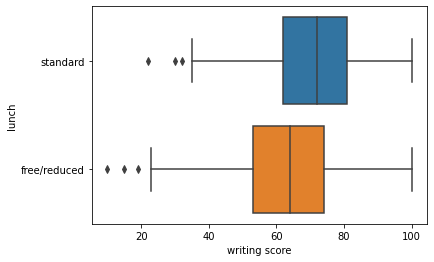

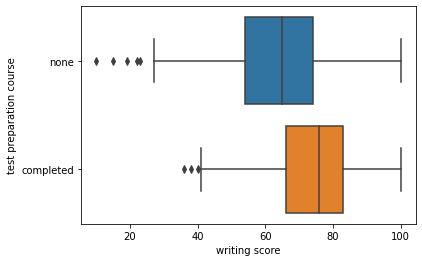

In [39]:
sns.boxplot(data=dataset, x="writing score", y="lunch")
plt.show()
sns.boxplot(data=dataset, x="writing score", y="test preparation course")
plt.show()

In [55]:
dataset[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [57]:
dataset[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

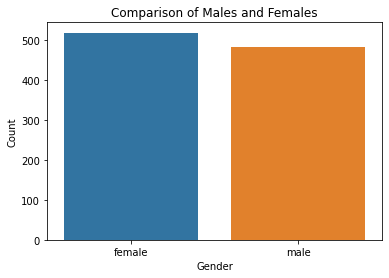

In [60]:
sns.countplot(x = dataset['gender'])
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

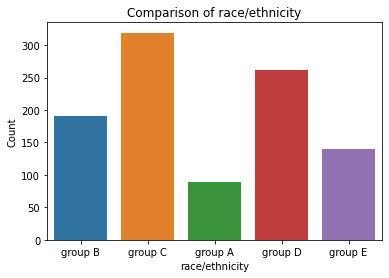

In [62]:
sns.countplot(x = dataset['race/ethnicity'])
plt.title('Comparison of race/ethnicity', fontweight = 30)
plt.xlabel('race/ethnicity')
plt.ylabel('Count')
plt.show()

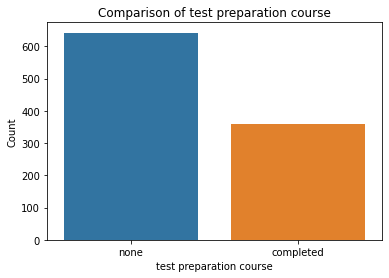

In [63]:
sns.countplot(x = dataset['test preparation course'])
plt.title('Comparison of test preparation course', fontweight = 30)
plt.xlabel('test preparation course')
plt.ylabel('Count')
plt.show()

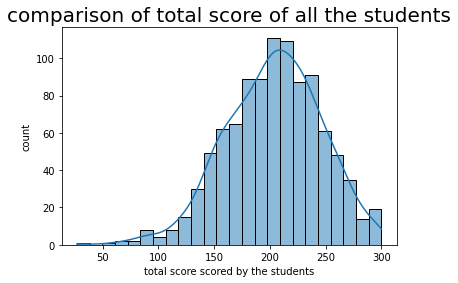

In [67]:
dataset['total_score'] = dataset['math score'] + dataset['reading score'] + dataset['writing score']

sns.histplot(dataset['total_score'], kde=True )

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

In [69]:
dataset['percentage'] = dataset['total_score']/3

 Assigning grades to the grades according to the following criteria :
 0  - 40 marks : grade E
 41 - 60 marks : grade D
 60 - 70 marks : grade C
 70 - 80 marks : grade B
 80 - 90 marks : grade A
 90 - 100 marks : grade O

In [73]:
def getgrade(percentage):
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

dataset['grades'] = dataset.apply(lambda x: getgrade(x['percentage']), axis = 1 )

dataset['grades'].value_counts()

B    261
C    256
D    255
A    146
O     52
E     30
Name: grades, dtype: int64

In [74]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,D
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B


In [76]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
dataset['test preparation course'] = le.fit_transform(dataset['test preparation course'])

# label encoding for lunch
dataset['lunch'] = le.fit_transform(dataset['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group A', 1)
dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group B', 2)
dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group C', 3)
dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group D', 4)
dataset['race/ethnicity'] = dataset['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
dataset['parental level of education'] = le.fit_transform(dataset['parental level of education'])

#label encoding for gender
dataset['gender'] = le.fit_transform(dataset['gender'])

# label encoding for pass_math
dataset['pass_math'] = le.fit_transform(dataset['pass_math'])

# label encoding for pass_reading
dataset['pass_reading'] = le.fit_transform(dataset['pass_reading'])

# label encoding for pass_writing
dataset['pass_writing'] = le.fit_transform(dataset['pass_writing'])

# label encoding for status
dataset['status'] = le.fit_transform(dataset['status'])

KeyError: ignored

In [77]:
!wget https://raw.githubusercontent.com/dsoellinger/Udacity-Machine-Learning-Nanodegree/master/assignments/dog-project/dog_app.ipynb

--2022-10-13 16:07:40--  https://raw.githubusercontent.com/dsoellinger/Udacity-Machine-Learning-Nanodegree/master/assignments/dog-project/dog_app.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477022 (1.4M) [text/plain]
Saving to: ‘dog_app.ipynb’

dog_app.ipynb       100%[===================>]   1.41M  --.-KB/s    in 0.02s   

2022-10-13 16:07:41 (64.6 MB/s) - ‘dog_app.ipynb’ saved [1477022/1477022]

